# EDA

# Table of contents
* [Overview](#Overview)
* [1. Imports](#1.-Imports)
* [2. Data Load](#2.-Data-Load)
* [3. Explore Data](#3.-Explore-Data)
* [4. Inferential Statistics](#4.-Inferential-Statistics)
* [5. Data Visualization](#5.-Data-Visualization)
* [Conclusion](#Conclusion)

## Overview

I am going to explore dataset to see some patterns or insights by data visualization and inferential statistics.   

Relevant website:
https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import t
import pandas as pd
from scipy.stats import ttest_ind
import pingouin as pg

## 2. Data Load

In [2]:
# data load
data = pd.read_pickle('/Users/hansangjun/Desktop/Springboard/Capstone2/data/telco_data/AfterWrangling.pkl')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

## 3. Explore Data

No     5174
Yes    1869
Name: Churn Label, dtype: int64


Text(0.5, 1.0, 'Count Churn')

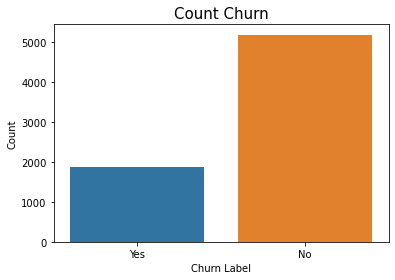

In [4]:
# Column 'Churn Label' will be our dependent variable.
print(data['Churn Label'].value_counts())
p = sns.countplot(x="Churn Label",
                data=data)

p.set_xlabel("Churn Label", fontsize = 10)
p.set_ylabel("Count", fontsize = 10)
p.set_title("Count Churn", fontsize = 15)

In [6]:
# percentage of yes and no
len_no = len(data[data['Churn Label'] == "No"])
len_yes = len(data[data['Churn Label'] == "Yes"])

percentage_no = (len_no / (len_no + len_yes)) * 100
percentage_yes = 100 - percentage_no

print (f"Percentage of the customer remained with the company is {percentage_no}.")
print (f"Percentage of the customer left the company this quarter is {percentage_yes}.")

Percentage of the customer remained with the company is 73.4630129206304.
Percentage of the customer left the company this quarter is 26.536987079369595.


The above result tells that dependent variable is imbalanced. I am going to address imbalance in the preprocessing part.

In [7]:
# Mean group by 'Churn Label'
data.groupby('Churn Label').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
Churn Label,,,,,
No,37.569965,61.265124,2549.911442,50.098183,4490.921337
Yes,17.979133,74.441332,1531.796094,82.510433,4149.414660


[(0.0, 4541.2111672190595)]

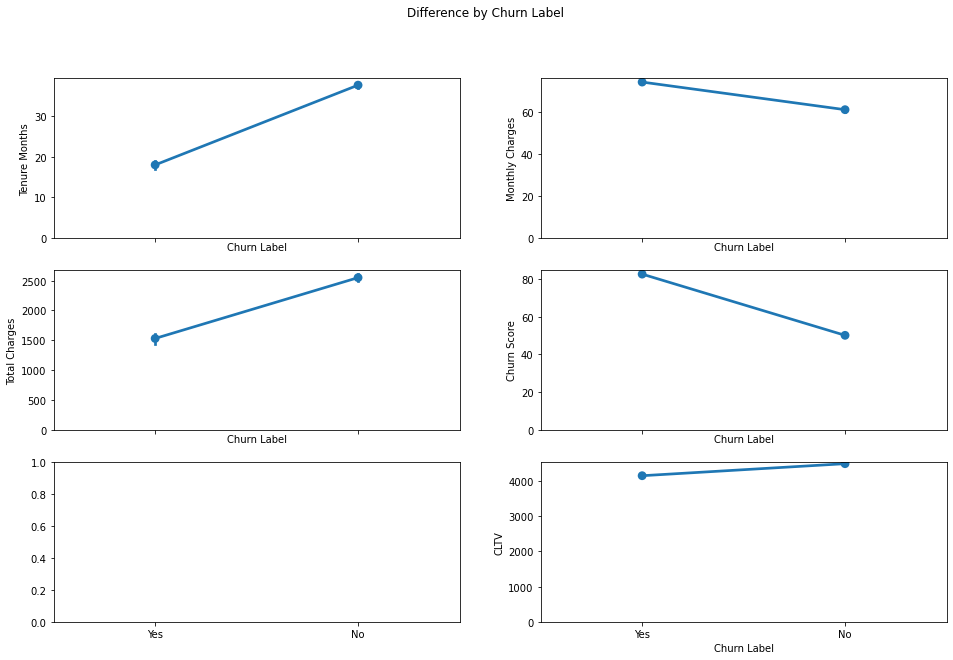

In [25]:
#sns.pointplot(x='Churn Label',y='Tenure Months',data=data).set(ylim=(0, None))

fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16,10))
fig.suptitle('Difference by Churn Label')

sns.pointplot(ax=axes[0, 0], x='Churn Label',y='Tenure Months',data=data).set(ylim=(0, None))
sns.pointplot(ax=axes[0, 1], x='Churn Label',y='Monthly Charges',data=data).set(ylim=(0, None))
sns.pointplot(ax=axes[1, 0], x='Churn Label',y='Total Charges',data=data).set(ylim=(0, None))
sns.pointplot(ax=axes[1, 1], x='Churn Label',y='Churn Score',data=data).set(ylim=(0, None))
sns.pointplot(ax=axes[2, 1], x='Churn Label',y='CLTV',data=data).set(ylim=(0, None))




Above slope graphs tell that churned customer relatively has fewer tenure months, lower total charges, and higher churn score compared to not churned customer.

## 4. Inferential Statistics

### T-test #1

I am going to run t-test to figure out relationship between two variables: 'Monthly Charges' and 'Churn Label'
1. Null hypothesis: monthly charges with churn customer >= monthly charges with no churn customer

2. Alternative hypothesis: monthly charges with churn customer < monthly charges with no churn customer

In [5]:
x0 = data['Monthly Charges'][data['Churn Label'] == "Yes"]
x1 = data['Monthly Charges'][data['Churn Label'] == "No"]
n0 = len(x0)
n1 = len(x1)
n0, n1

(1869, 5174)

In [6]:
xbar0 = np.mean(x0)
xbar1 = np.mean(x1)
s0 = np.std(x0, ddof=1)
s1 = np.std(x1, ddof=1)
sp = np.sqrt( ((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / ( n0 + n1 - 2) )
t_stat = ( xbar0 - xbar1 ) / ( sp * np.sqrt( 1/n0 + 1/n1 ) )

total_dof = n0 + n1 - 2
p_value = 2 * t.cdf(t_stat, df=total_dof)
print(f"t-statistic is {t_stat}.")
print(f"p_value is {p_value}.")
print("Since p-value is greater than 0.05, we accept the null hypothesis. We can say null hypothesis is true.")

t-statistic is 16.536738015936432.
p_value is 2.0.
Since p-value is greater than 0.05, we accept the null hypothesis. We can say null hypothesis is true.


In [3]:
#define samples
group1 = data[data['Churn Label']=='Yes']
group2 = data[data['Churn Label']=='No']

#perform independent two sample t-test
ttest_ind(group1['Monthly Charges'], group2['Monthly Charges'])

Ttest_indResult(statistic=16.53673801593631, pvalue=2.706645606888261e-60)

This tells that two groups are significantly different.

In [6]:
data['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [8]:
# Conducting two-sample ttest
#print(group1)
result = pg.ttest(group1['Monthly Charges'],
                  group2['Monthly Charges'],
                  correction=True)
 
# Print the result
print(result)

                T          dof alternative         p-val           CI95%  \
T-test  18.407527  4135.795018   two-sided  8.592449e-73  [11.77, 14.58]   

         cohen-d       BF10  power  
T-test  0.446283  1.519e+70    1.0  


### T-test #2

I am going to run t-test to figure out relationship between two variables: 'Tenure Months' and 'Churn Label'
1. Null hypothesis: Tenure Months with churn customer >= Tenure Months with no churn customer
2. Alternative hypothesis: Tenure Months with churn customer < Tenure Months with no churn customer

In [36]:
x0 = data['Tenure Months'][data['Churn Label'] == "Yes"]
x1 = data['Tenure Months'][data['Churn Label'] == "No"]
n0 = len(x0)
n1 = len(x1)
n0, n1

(1869, 5174)

In [38]:
xbar0 = np.mean(x0)
xbar1 = np.mean(x1)
s0 = np.std(x0, ddof=1)
s1 = np.std(x1, ddof=1)
sp = np.sqrt( ((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / ( n0 + n1 - 2) )
t_stat = ( xbar0 - xbar1 ) / ( sp * np.sqrt( 1/n0 + 1/n1 ) )

total_dof = n0 + n1 - 2
p_value = 2 * t.cdf(t_stat, df=total_dof)
print(f"t-statistic is {t_stat}.")
print(f"p_value is {p_value}.")
print("Since p-value is less than 0.05, we reject the null hypothesis. We can say null hypothesis is false.")

t-statistic is -31.579550511353805.
p_value is 7.99905796058294e-205.
Since p-value is less than 0.05, we reject the null hypothesis. We can say null hypothesis is false.


### Chi-Square - case #1 (Churn Label and Phone Service)

Null Hypothesis: There is no relation between two variables: Churn Label and Phone Service.

In [26]:
# Define contigency
contigency= pd.crosstab(data['Churn Label'], data['Phone Service'])
contigency_pct = pd.crosstab(data['Churn Label'], data['Phone Service'], normalize='index')
print(contigency)
print(contigency_pct)

Phone Service   No   Yes
Churn Label             
No             512  4662
Yes            170  1699
Phone Service        No       Yes
Churn Label                      
No             0.098956  0.901044
Yes            0.090958  0.909042


<AxesSubplot:xlabel='Phone Service', ylabel='Churn Label'>

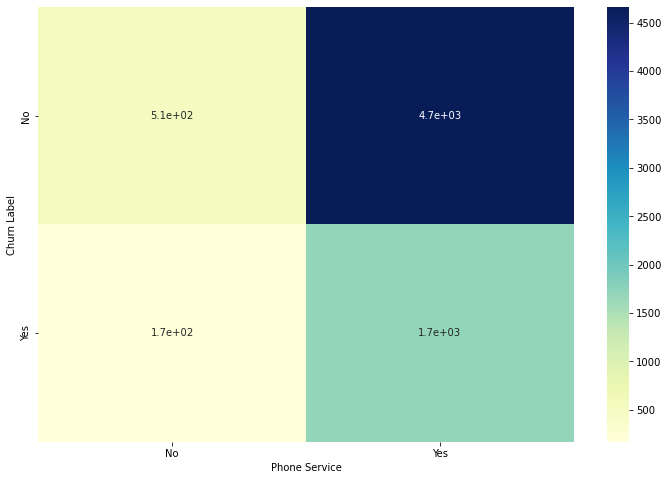

In [27]:
# Heatmap of coningency
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [28]:
c, p, dof, expected = chi2_contingency(contigency)
f"P-value is {p}. Therefore, we accept the null hypothesis. Two variables are independent."

'P-value is 0.3387825358066928. Therefore, we accept the null hypothesis. Two variables are independent.'

### Chi-Square - case #2 (Churn Label and Senior Citizen)

Null Hypothesis: There is no relation between two variables: Churn Label and Senior Citizen.

In [31]:
# Define contigency
contigency= pd.crosstab(data['Churn Label'], data['Senior Citizen'])
contigency_pct = pd.crosstab(data['Churn Label'], data['Senior Citizen'], normalize='index')
c, p, dof, expected = chi2_contingency(contigency)

print(contigency)
print(contigency_pct)
f"P-value is {p} which is less than 0.05. Therefore, we reject the null hypothesis. Two variables are related."

Senior Citizen    No  Yes
Churn Label              
No              4508  666
Yes             1393  476
Senior Citizen        No       Yes
Churn Label                       
No              0.871279  0.128721
Yes             0.745318  0.254682


'P-value is 1.510066805092378e-36 which is less than 0.05. Therefore, we reject the null hypothesis. Two variables are related.'

## 5. Data Visualization 

I am going to visualize all the object variable with Churn Label.

In [48]:
data.select_dtypes('object').columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label'],
      dtype='object')

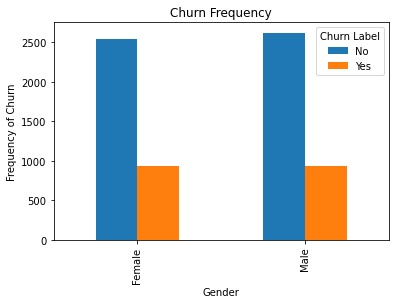

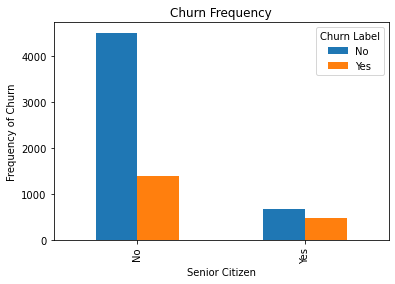

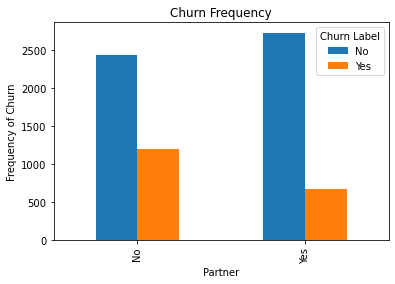

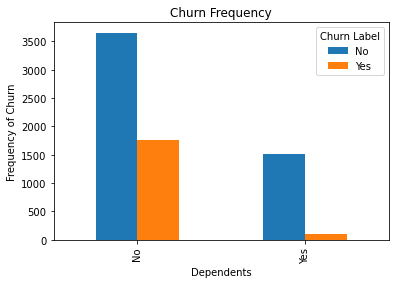

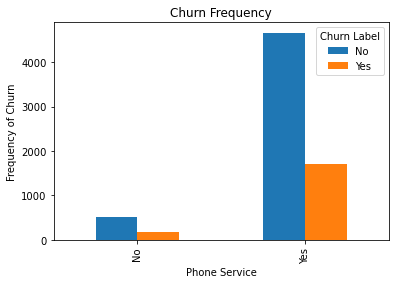

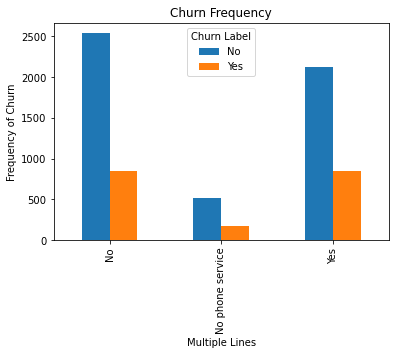

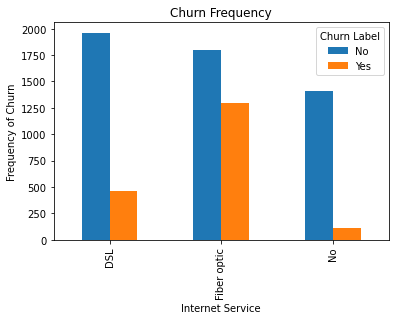

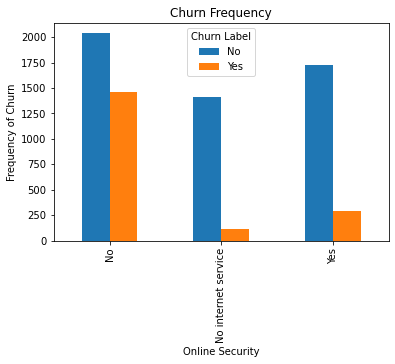

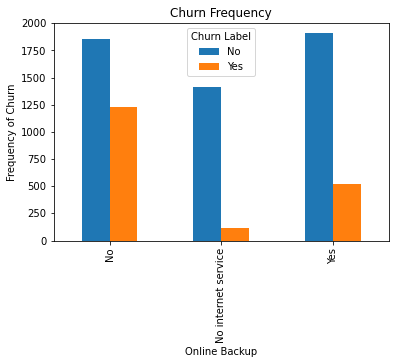

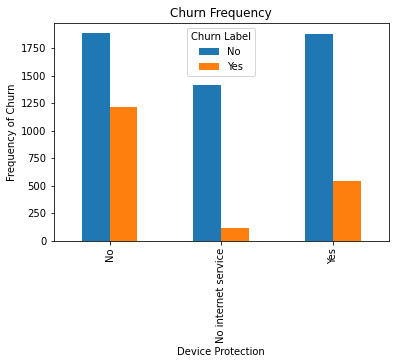

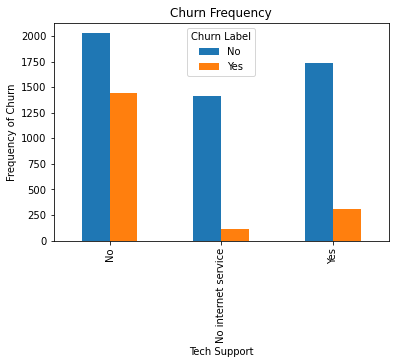

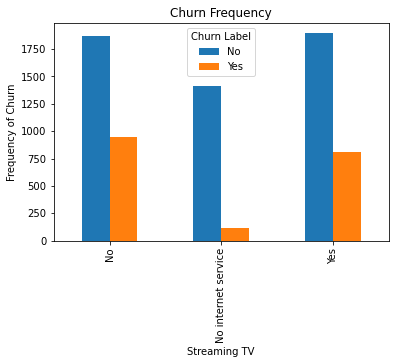

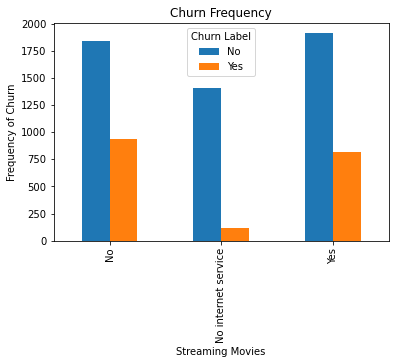

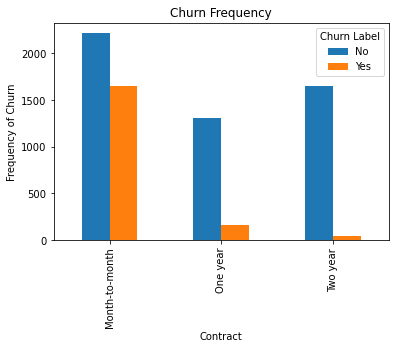

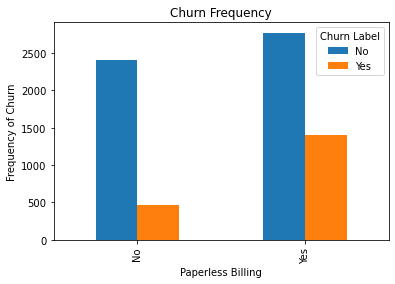

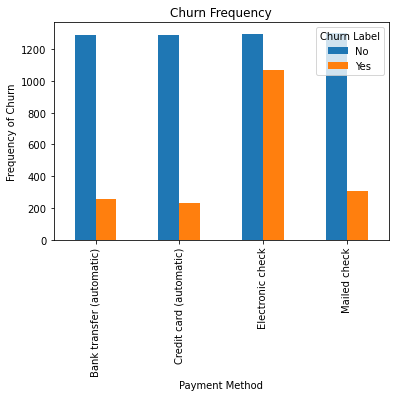

In [52]:
for i in range(len(data.select_dtypes('object').columns)):
    if i == len(data.select_dtypes('object').columns) - 1:
        break
    else:
        pd.crosstab(data[data.select_dtypes('object').columns[i]], data['Churn Label']).plot(kind='bar')
        plt.title('Churn Frequency')
        plt.xlabel(data.select_dtypes('object').columns[i])
        plt.ylabel('Frequency of Churn')


Text(0, 0.5, 'Frequency of Churn')

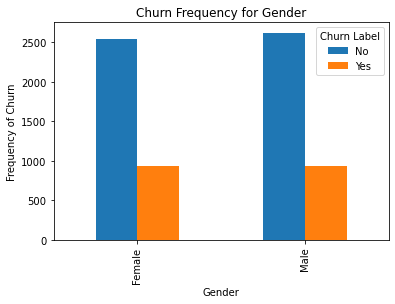

In [39]:
pd.crosstab(data['Gender'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Churn')

Not a good predictor

Text(0, 0.5, 'Frequency of Churn')

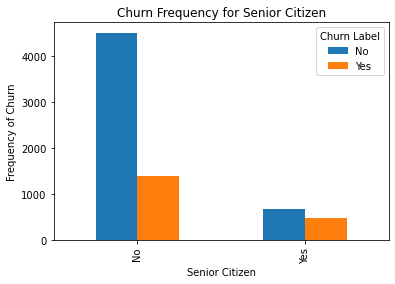

In [40]:
## Visualization
pd.crosstab(data['Senior Citizen'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency of Churn')


This is a good predictor.

Text(0, 0.5, 'Frequency of Churn')

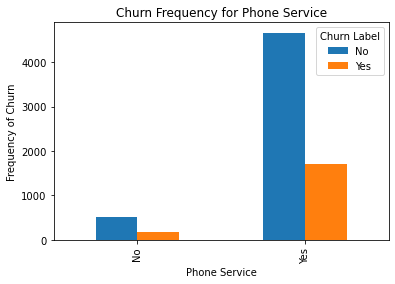

In [41]:
## Visualization
pd.crosstab(data['Phone Service'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Frequency of Churn')


'Phone Service' is a good predictor.

Text(0, 0.5, 'Frequency of Churn')

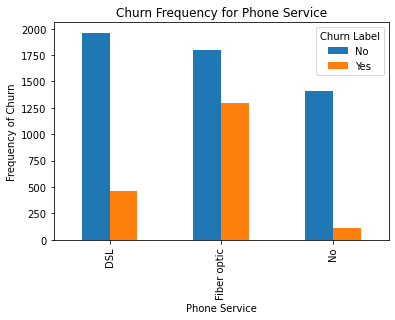

In [42]:
## Visualization
pd.crosstab(data['Internet Service'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Frequency of Churn')


'Internet Service' can be a good predictor.

## Conclusion

1. Slope graphs tell that churned customer relatively has fewer tenure months, lower total charges, and higher churn score compared to not churned customer. 
2. Crosstab plot tells whether the feature is good predictor or not.
3. T-test verifies that churned customer has fewer tenure months. 